# DeepLearningノート

### 準備

パッケージ読み込み

In [1]:
import sys, os
import numpy as np
import pickle
from machine_learning_for_scratch.dataset.mnist import load_mnist
from PIL import Image
import math
import matplotlib.pyplot as plt

シグモイド関数
$$
\sigma(x) = \frac{1}{1+\exp{(-x)}}
$$
ソフトマックス関数
$$
y_k = \frac{\exp{(a_k)}}{{\displaystyle \sum^{n}_{i=1}} \exp{(a_i)}}
$$


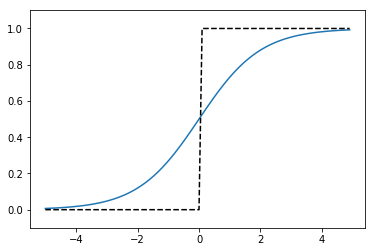

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()

解析用にMNISTデータ読み込み

In [4]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

ネットワーク読み込み

In [5]:
def init_network():
    with open(os.path.join("machine_learning_for_scratch","sample_weight.pkl"), 'rb') as f:
        network = pickle.load(f)
    return network

ネットワーク使用

In [6]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

画像確認

In [7]:
def img_show(img):
    img = img*255
    img = img.reshape(28, 28)
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [8]:
def plt_show(img):
    img = img*255
    plt.imshow(img.reshape(28,28))
    plt.show()

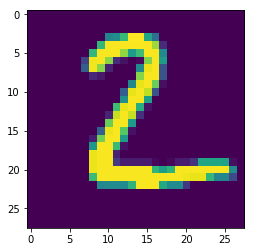

In [10]:
x, t = get_data()
#img_show(x[1])
plt_show(x[1])

## 解析開始

とりあえず解析してみる。

セッティング：

In [11]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
wrong = []

精度確認

In [12]:
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1
    else:
        wrong.append(i)

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


間違えた図を見てみる

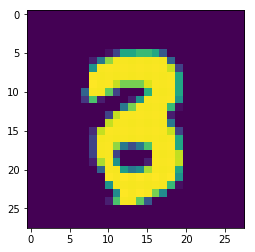

答： 3 。予想： 8


In [21]:
i=78
plt_show(x[wrong[i]])
print("答：",t[wrong[i]],"。予想：",np.argmax(predict(network,x[wrong[i]])))

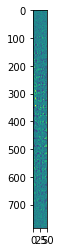

In [27]:
plt.imshow(network["W1"])
plt.show()

In [30]:
pil_img = Image.fromarray(np.uint8(network["W1"]*255))
pil_img.show()

In [21]:
network.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [8]:
network['W1']
len(network['W1'])

784

In [9]:
network["W1"][350]

array([ 0.20352413, -0.33930475,  0.06150815, -0.26631057, -0.07892901,
       -0.2160303 , -0.22190729, -0.01528745, -0.01297976,  0.05398425,
       -0.15247467,  0.18364453,  0.11850423,  0.31343549, -0.25951135,
        0.15251592, -0.07604213,  0.09956405,  0.20716119,  0.01191536,
       -0.0500697 ,  0.10915728,  0.04131675, -0.09007927,  0.10182612,
       -0.13656642,  0.23715706, -0.17780851,  0.25585544,  0.17799285,
        0.12032107,  0.07057133, -0.15111442,  0.02421915, -0.04981516,
        0.2289737 ,  0.17567438,  0.22678043,  0.04445645,  0.01567732,
        0.04406427,  0.02775704,  0.10654916, -0.18257031,  0.09333349,
        0.07071131, -0.1976741 , -0.28023955,  0.10439868, -0.21244228], dtype=float32)

In [10]:
len(network["W1"][0])

50

In [11]:
for key in network.keys():
    print(key, network[key].shape)

b2 (100,)
W1 (784, 50)
b1 (50,)
W2 (50, 100)
W3 (100, 10)
b3 (10,)


In [10]:
img_show(x[1]*255)

In [11]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

In [117]:
a1 = np.dot(x[100], W1) + b1
z1 = sigmoid(a1)
a2 = np.dot(z1, W2) + b2
z2 = sigmoid(a2)
a3 = np.dot(z2, W3) + b3
y = softmax(a3)

In [118]:
print(y)
np.argmax(y)

[  1.64981786e-04   2.80873734e-04   4.46586162e-02   6.82160753e-05
   1.76548329e-03   7.07103754e-04   9.52186167e-01   3.33890021e-05
   1.32181682e-04   3.10497694e-06]


6

In [119]:
W3

array([[ -4.21735764e-01,   6.89445496e-01,   8.78510177e-02,
         -4.83838320e-01,  -1.95891604e-01,  -3.11136067e-01,
          5.49542189e-01,   5.37674278e-02,  -3.05000603e-01,
          2.75984704e-02],
       [ -5.24320543e-01,  -1.43624887e-01,  -4.42160573e-03,
          4.17745829e-01,   2.15625867e-01,  -2.56584466e-01,
         -1.00939667e+00,   8.12479675e-01,  -3.98552269e-02,
          8.23425591e-01],
       [  6.82799876e-01,  -5.12037337e-01,  -4.41083580e-01,
         -8.21710154e-02,   3.19505751e-01,   1.08093655e+00,
          2.96021044e-01,  -4.06458199e-01,  -3.87590617e-01,
         -9.11374271e-01],
       [  1.55144155e-01,   6.78902492e-02,   9.47823405e-01,
         -1.68429948e-02,  -5.80456555e-01,   3.27762365e-02,
          3.62194031e-01,   7.43931830e-01,  -8.67070615e-01,
         -8.71464610e-01],
       [  5.05435288e-01,  -2.73010045e-01,  -3.86344641e-02,
          1.62854403e-01,  -6.88129485e-01,   3.32544267e-01,
          2.02865437e-01

In [37]:
for i in range(1,1000):
    if t[i] == 0:
        print(i)
        break

3


In [39]:
img_show(x[3]*255)

In [18]:
y

array([  4.83633252e-03,   1.10458664e-03,   9.44252312e-01,
         1.43091511e-02,   5.69896656e-07,   6.67604851e-03,
         2.75334045e-02,   1.27084218e-06,   1.28642481e-03,
         4.78648055e-08], dtype=float32)

In [44]:
a3

array([ 2.07899594,  0.60231042,  7.35323238,  3.16373825, -6.96721649,
        2.40136504,  3.81823897, -6.16523695,  0.75470579, -9.44429111], dtype=float32)

In [110]:
y = np.array([5,0,0,0,0,0,0,0,0,0])

In [83]:
a_back2 = sigmoid(np.dot(W3,y-b3))
a_back1 = sigmoid(np.dot(W2,a_back2-b2))
a_back = sigmoid(np.dot(W1,a_back1-b1))
img_show(np.absolute(a_back-0.5)*255)

In [81]:
a_back2 = sigmoid(np.dot(W3,y))
a_back1 = sigmoid(np.dot(W2,a_back2))
a_back = sigmoid(np.dot(W1,a_back1))
img_show((a_back-0.5)*255)

In [111]:
a_back2 = sigmoid(np.dot(W3,y))-0.5
a_back1 = sigmoid(np.dot(W2,a_back2-b2))-0.5
a_back = sigmoid(np.dot(W1,a_back1-b1))
img = a_back-0.5
img[img<0] = 0
img_show(img*255)

In [112]:
b1

array([-0.06750315,  0.0695926 , -0.02730473,  0.02256093, -0.22001474,
       -0.22038847,  0.04862635,  0.13499236,  0.23342554, -0.0487357 ,
        0.10170191, -0.03076038,  0.15482435,  0.05212503,  0.06017235,
       -0.03364862, -0.11218343, -0.26460695, -0.03323386,  0.13610415,
        0.06354368,  0.04679805, -0.01621654, -0.05775835, -0.03108677,
        0.10366164, -0.0845938 ,  0.11665157,  0.21852103,  0.04437255,
        0.03378392, -0.01720384, -0.07383765,  0.16152057, -0.10621249,
       -0.01646949,  0.00913961,  0.10238428,  0.00916639, -0.0564299 ,
       -0.10607515,  0.09892716, -0.07136887, -0.06349134,  0.12461706,
        0.02242282, -0.00047972,  0.04527043, -0.15179175,  0.10716812], dtype=float32)

In [113]:
b2

array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306, -0.03

In [114]:
b3

array([-0.06023985,  0.00932628, -0.01359946,  0.02167128,  0.0107372 ,
        0.06619699, -0.08397342, -0.00912251,  0.00576962,  0.0532335 ], dtype=float32)